<a href="https://colab.research.google.com/github/bivekpok/DSPS_BPokhrel/blob/main/HW9/pokhrel_hw9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import pylab as pl
import os
import json
%pylab inline
# pl.style.use("https://raw.githubusercontent.com/fedhere/DSPS/master/fbb.mplstyle")

Populating the interactive namespace from numpy and matplotlib


In [2]:

!pip install kaggle

In [3]:
from google.colab import drive

drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
pwd

'/content'

In [5]:
cd /content/gdrive/MyDrive/Dsps/kaggleHiggs


/content/gdrive/MyDrive/Dsps/kaggleHiggs


In [6]:
!ls
# mv kaggle.json .kaggle.json

HiggsBosonCompetition_AMSMetric_rev1.py  random_submission.zip	training.csv
higgs-boson.zip				 test.zip		training.zip


- Download the Higgs boson data from Kaggle (programmatically within the notebook)
see how I did it in the Titanic Trees notebook https://github.com/fedhere/DSPS/blob/master/lab9/titanictree.ipynb

find the correct API link here https://www.kaggle.com/c/higgs-boson/data



- Read in the trainind data. Split the provided training data into a training and a test set.
The last 2 columns are what you want to predict: "weight" and "label".
Remove them from the input data and create a separate variable label and a separate variable weight, which will be your target variables for, respectively, classification and regression.



In [7]:
# !chmod 600 kaggle.json

In [8]:
# envs = json.load(open("kaggle.json", "r"))
# os.environ["KAGGLE_USERNAME"] = envs['username']
# os.environ["KAGGLE_KEY"] = envs['key']

In [9]:
# !kaggle datasets list

In [10]:
# envs

In [11]:
# !mkdir kaggleHiggs

In [12]:
# cd kaggleHiggs

In [13]:
# !kaggle competitions download -c higgs-boson


In [14]:
# !unzip higgs-boson.zip -d ./

In [15]:
# ls

In [16]:
# !unzip training.zip -d ./

In [17]:
higgsdata_all = pd.read_csv('./training.csv')

In [18]:
higgsdata_all.isna().sum()

EventId                        0
DER_mass_MMC                   0
DER_mass_transverse_met_lep    0
DER_mass_vis                   0
DER_pt_h                       0
DER_deltaeta_jet_jet           0
DER_mass_jet_jet               0
DER_prodeta_jet_jet            0
DER_deltar_tau_lep             0
DER_pt_tot                     0
DER_sum_pt                     0
DER_pt_ratio_lep_tau           0
DER_met_phi_centrality         0
DER_lep_eta_centrality         0
PRI_tau_pt                     0
PRI_tau_eta                    0
PRI_tau_phi                    0
PRI_lep_pt                     0
PRI_lep_eta                    0
PRI_lep_phi                    0
PRI_met                        0
PRI_met_phi                    0
PRI_met_sumet                  0
PRI_jet_num                    0
PRI_jet_leading_pt             0
PRI_jet_leading_eta            0
PRI_jet_leading_phi            0
PRI_jet_subleading_pt          0
PRI_jet_subleading_eta         0
PRI_jet_subleading_phi         0
PRI_jet_al

In [19]:
!pip install missingno

In [20]:
import missingno as msno

<Axes: >

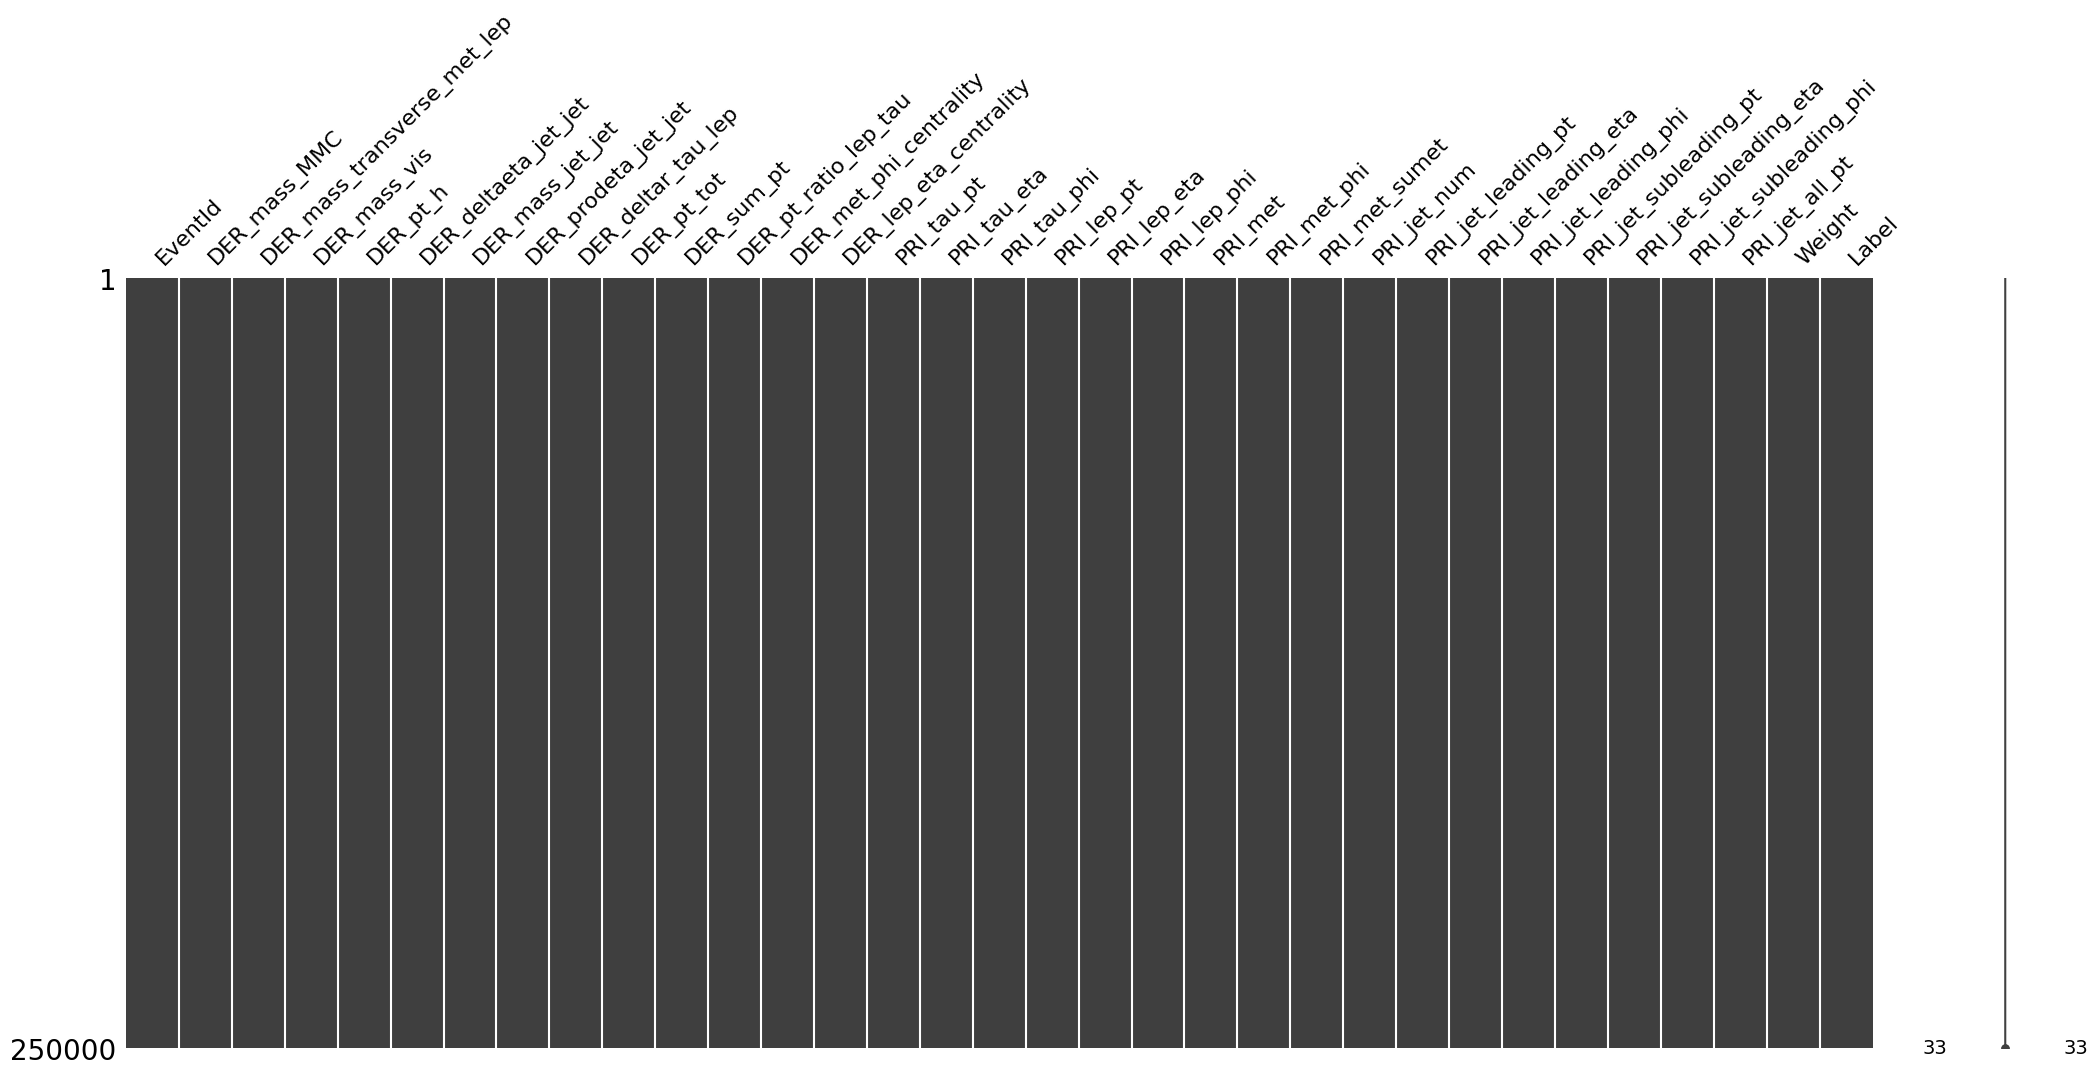

In [21]:
msno.matrix(higgsdata_all)

In [22]:
higgsdata= higgsdata_all.drop(['Weight', 'Label'], axis = 1)

In [23]:
higgsdata.describe()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,...,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,224999.500000,-49.023079,49.239819,81.181982,57.895962,-708.420675,-601.237051,-709.356603,2.373100,18.917332,...,-0.010119,209.797178,0.979176,-348.329567,-399.254314,-399.259788,-692.381204,-709.121609,-709.118631,73.064591
std,72168.927986,406.345647,35.344886,40.828691,63.655682,454.480565,657.972302,453.019877,0.782911,22.273494,...,1.812223,126.499506,0.977426,532.962789,489.338286,489.333883,479.875496,453.384624,453.389017,98.015662
min,100000.000000,-999.000000,0.000000,6.329000,0.000000,-999.000000,-999.000000,-999.000000,0.208000,0.000000,...,-3.142000,13.678000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000
25%,162499.750000,78.100750,19.241000,59.388750,14.068750,-999.000000,-999.000000,-999.000000,1.810000,2.841000,...,-1.575000,123.017500,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-0.000000
50%,224999.500000,105.012000,46.524000,73.752000,38.467500,-999.000000,-999.000000,-999.000000,2.491500,12.315500,...,-0.024000,179.739000,1.000000,38.960000,-1.872000,-2.093000,-999.000000,-999.000000,-999.000000,40.512500
75%,287499.250000,130.606250,73.598000,92.259000,79.169000,0.490000,83.446000,-4.593000,2.961000,27.591000,...,1.561000,263.379250,2.000000,75.349000,0.433000,0.503000,33.703000,-2.457000,-2.275000,109.933750
max,349999.000000,1192.026000,690.075000,1349.351000,2834.999000,8.503000,4974.979000,16.690000,5.684000,2834.999000,...,3.142000,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000


In [24]:
column_stat = higgsdata.agg(['mean','median', 'min'])
column_stat

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
mean,224999.5,-49.023079,49.239819,81.181982,57.895962,-708.420675,-601.237051,-709.356603,2.3731,18.917332,...,-0.010119,209.797178,0.979176,-348.329567,-399.254314,-399.259788,-692.381204,-709.121609,-709.118631,73.064591
median,224999.5,105.012000,46.524000,73.752000,38.467500,-999.000000,-999.000000,-999.000000,2.4915,12.315500,...,-0.024000,179.739000,1.000000,38.960000,-1.872000,-2.093000,-999.000000,-999.000000,-999.000000,40.512500
min,100000.0,-999.000000,0.000000,6.329000,0.000000,-999.000000,-999.000000,-999.000000,0.2080,0.000000,...,-3.142000,13.678000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000


In [25]:
(column_stat.loc['min',:] == -999).values

array([False,  True, False, False, False,  True,  True,  True, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False,  True,  True,  True,
        True,  True,  True, False])

In [26]:
columns2 = column_stat.columns[(column_stat.loc['min',:] == -999).values]

In [27]:
column_stat.loc['min',:] == -999

EventId                        False
DER_mass_MMC                    True
DER_mass_transverse_met_lep    False
DER_mass_vis                   False
DER_pt_h                       False
DER_deltaeta_jet_jet            True
DER_mass_jet_jet                True
DER_prodeta_jet_jet             True
DER_deltar_tau_lep             False
DER_pt_tot                     False
DER_sum_pt                     False
DER_pt_ratio_lep_tau           False
DER_met_phi_centrality         False
DER_lep_eta_centrality          True
PRI_tau_pt                     False
PRI_tau_eta                    False
PRI_tau_phi                    False
PRI_lep_pt                     False
PRI_lep_eta                    False
PRI_lep_phi                    False
PRI_met                        False
PRI_met_phi                    False
PRI_met_sumet                  False
PRI_jet_num                    False
PRI_jet_leading_pt              True
PRI_jet_leading_eta             True
PRI_jet_leading_phi             True
P

In [28]:
column_stat.loc['mean',columns2]

DER_mass_MMC              -49.023079
DER_deltaeta_jet_jet     -708.420675
DER_mass_jet_jet         -601.237051
DER_prodeta_jet_jet      -709.356603
DER_lep_eta_centrality   -708.985189
PRI_jet_leading_pt       -348.329567
PRI_jet_leading_eta      -399.254314
PRI_jet_leading_phi      -399.259788
PRI_jet_subleading_pt    -692.381204
PRI_jet_subleading_eta   -709.121609
PRI_jet_subleading_phi   -709.118631
Name: mean, dtype: float64

In [29]:
diff = abs(column_stat.loc['mean', columns2] - column_stat.loc['median', columns2] )
columns3 = diff[diff>350]


In [30]:
columns3.index.tolist()

['DER_mass_jet_jet',
 'PRI_jet_leading_pt',
 'PRI_jet_leading_eta',
 'PRI_jet_leading_phi']

In [31]:
higgsdata2 = higgsdata.copy()
column_stat.loc['mean', columns3.index.tolist() ]
for c in columns3.index.tolist():
  higgsdata2[c] = higgsdata2[c].replace(-999.000000,column_stat.loc['mean', c ] )

### I replaced the -999.000 values in the dataset with the mean where in the case where the mean and median deffered by greater than 350. It suggets that if mean and median are diffrent by a lot there might be many large negatives like -999 so I replaced only those rows with its mean.

### second dataset = higgsdata2

In [32]:
higgsdata2.describe()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,...,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,224999.500000,-49.023079,49.239819,81.181982,57.895962,-708.420675,-318.893772,-709.356603,2.373100,18.917332,...,-0.010119,209.797178,0.979176,-88.287827,-159.564751,-159.572413,-692.381204,-709.121609,-709.118631,73.064591
std,72168.927986,406.345647,35.344886,40.828691,63.655682,454.480565,490.819070,453.019877,0.782911,22.273494,...,1.812223,126.499506,0.977426,217.313621,195.569132,195.567506,479.875496,453.384624,453.389017,98.015662
min,100000.000000,-999.000000,0.000000,6.329000,0.000000,-999.000000,-601.237051,-999.000000,0.208000,0.000000,...,-3.142000,13.678000,0.000000,-348.329567,-399.254314,-399.259788,-999.000000,-999.000000,-999.000000,0.000000
25%,162499.750000,78.100750,19.241000,59.388750,14.068750,-999.000000,-601.237051,-999.000000,1.810000,2.841000,...,-1.575000,123.017500,0.000000,-348.329567,-399.254314,-399.259788,-999.000000,-999.000000,-999.000000,-0.000000
50%,224999.500000,105.012000,46.524000,73.752000,38.467500,-999.000000,-601.237051,-999.000000,2.491500,12.315500,...,-0.024000,179.739000,1.000000,38.960000,-1.872000,-2.093000,-999.000000,-999.000000,-999.000000,40.512500
75%,287499.250000,130.606250,73.598000,92.259000,79.169000,0.490000,83.446000,-4.593000,2.961000,27.591000,...,1.561000,263.379250,2.000000,75.349000,0.433000,0.503000,33.703000,-2.457000,-2.275000,109.933750
max,349999.000000,1192.026000,690.075000,1349.351000,2834.999000,8.503000,4974.979000,16.690000,5.684000,2834.999000,...,3.142000,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000


In [33]:
higgsdata2

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,100000,138.470,51.655,97.827,27.980,0.91,124.711000,2.666,3.064,41.928,...,-0.277,258.733,2,67.435000,2.150000,0.444000,46.062,1.24,-2.475,113.497
1,100001,160.937,68.768,103.235,48.146,-999.00,-601.237051,-999.000,3.473,2.078,...,-1.916,164.546,1,46.226000,0.725000,1.158000,-999.000,-999.00,-999.000,46.226
2,100002,-999.000,162.172,125.953,35.635,-999.00,-601.237051,-999.000,3.148,9.336,...,-2.186,260.414,1,44.251000,2.053000,-2.028000,-999.000,-999.00,-999.000,44.251
3,100003,143.905,81.417,80.943,0.414,-999.00,-601.237051,-999.000,3.310,0.414,...,0.060,86.062,0,-348.329567,-399.254314,-399.259788,-999.000,-999.00,-999.000,-0.000
4,100004,175.864,16.915,134.805,16.405,-999.00,-601.237051,-999.000,3.891,16.405,...,-0.871,53.131,0,-348.329567,-399.254314,-399.259788,-999.000,-999.00,-999.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,349995,-999.000,71.989,36.548,5.042,-999.00,-601.237051,-999.000,1.392,5.042,...,2.859,144.665,0,-348.329567,-399.254314,-399.259788,-999.000,-999.00,-999.000,0.000
249996,349996,-999.000,58.179,68.083,22.439,-999.00,-601.237051,-999.000,2.585,22.439,...,-0.867,80.408,0,-348.329567,-399.254314,-399.259788,-999.000,-999.00,-999.000,-0.000
249997,349997,105.457,60.526,75.839,39.757,-999.00,-601.237051,-999.000,2.390,22.183,...,-2.890,198.907,1,41.992000,1.800000,-0.166000,-999.000,-999.00,-999.000,41.992
249998,349998,94.951,19.362,68.812,13.504,-999.00,-601.237051,-999.000,3.365,13.504,...,0.811,112.718,0,-348.329567,-399.254314,-399.259788,-999.000,-999.00,-999.000,0.000


In [34]:
labels = higgsdata_all['Label']
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)
print(np.sum(labels == 0))
# print(([labels == '1'].sum()))
np.unique(labels)

164333


array([0, 1])

In [35]:
# print((labels[labels == 'b'].count())/((labels[labels == 'b'].count())+(labels[labels == 's'].count())))

In [36]:
# from sklearn.preprocessing import LabelEncoder
# label_encoder = LabelEncoder()
# labels = label_encoder.fit_transform(labels)

In [37]:
# n_labels.sum()

In [38]:
weights = higgsdata_all['Weight']
weights

0         0.002653
1         2.233584
2         2.347389
3         5.446378
4         6.245333
            ...   
249995    4.505083
249996    2.497259
249997    0.018636
249998    1.681611
249999    1.877474
Name: Weight, Length: 250000, dtype: float64

In [39]:
# leave
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(higgsdata, labels, test_size=0.2, random_state=42)
X_train2, X_test2, y_train2, y_test2  = train_test_split(higgsdata2, labels, test_size=0.2, random_state=42)

- Use a Random Forest and a Gradiend Boosted Tree Classifier model to predict the label of the particles. get the score of the model on the training and test set and comment on the result for each model.


In [40]:
#leave
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification
from pprint import pprint

# Look at parameters used by our current forest
rf = RandomForestClassifier(random_state = 0)
rf.fit(X_train, y_train)
rf2 = RandomForestClassifier(random_state = 0)
rf2.fit(X_train2, y_train2)
print('Parameters currently in use:\n')
pprint(rf.get_params())
pprint(rf2.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}
{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}


In [41]:
gbt = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=3, random_state=0)
gbt2 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=3, random_state=0)

In [42]:
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=0)

In [43]:
gbt.fit(X_train, y_train)
gbt2.fit(X_train2, y_train2)


GradientBoostingClassifier(learning_rate=1.0, random_state=0)

calculate the  scores for the training and test sets and evaluate  overtraining etc

In [44]:
print (f'  Random forest: X_train, y_train score:  {rf.score(X_train, y_train):.2f}')
print (f' Random forest: X_test, X_test score:  {rf.score(X_test, y_test):.2f}')
print (f' Gradient BT : X_train, y_train score:  {gbt.score(X_train, y_train):.2f}')
print (f' Gradient BT : X_test, y_test score:  {gbt.score(X_test, y_test):.2f}')

  Random forest: X_train, y_train score:  1.00
 Random forest: X_test, X_test score:  0.84
 Gradient BT : X_train, y_train score:  0.84
 Gradient BT : X_test, y_test score:  0.83


In [45]:
print (f'  Random forest 2: X_train, y_train score:  {rf2.score(X_train2, y_train2):.2f}')
print (f' Random forest 2 : X_test, X_test score:  {rf2.score(X_test2, y_test2):.2f}')
print (f' Gradient BT 2 : X_train, y_train score:  {gbt2.score(X_train2, y_train2):.2f}')
print (f' Gradient BT 2 : X_test, y_test score:  {gbt2.score(X_test2, y_test2):.2f}')

  Random forest: X_train, y_train score:  1.00
 Random forest: X_test, X_test score:  0.84
 Gradient BT : X_train, y_train score:  0.84
 Gradient BT : X_test, y_test score:  0.83


- Produce a confusion matrix for each model and compare them






### I initialized the model using same random_state and tried on both the dataset, I did not find andy difference on the scores from the two dataset (replacing -999 by thier mean )

In [46]:

# I creaded this function (mostly copied from sklearn examples).
# You can use it to create the confusion matrix
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(y_true, y_pred,
                          normalize=False,
                          title='',
                          cmap=pl.cm.bone):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
          title = title + ' Normalized confusion matrix'
    else:
          title = title + ' Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # plot it
    fig, ax = plt.subplots(1, 1)
    fig.subplots_adjust()
    im = ax.imshow(cm, cmap=cmap)
    ax_divider = make_axes_locatable(ax)
    # add an axes to the right of the main axes.
    pl.xticks([0, 1], labels=["N", "P"])
    pl.ylim(-0.5,1.5)
    pl.yticks([0,1], labels=["N", "P"])
    pl.title(title)
    cax = ax_divider.append_axes("right", size="10%", pad="2%")
    cb = colorbar(im, cax=cax)


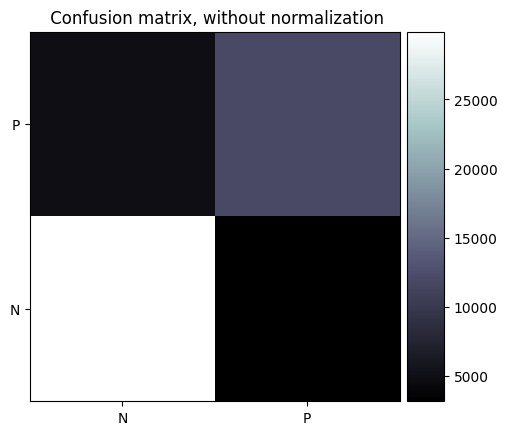

In [47]:
rf_y_pred = rf.predict(X_test)
plot_confusion_matrix(y_test, rf_y_pred)

### Fig1: Confusin matrix for random forest on first dataset

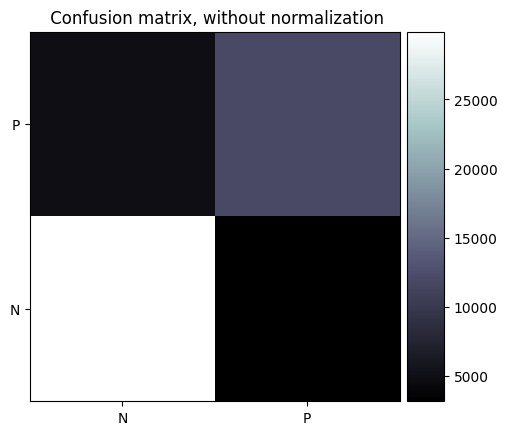

In [48]:
rf_y_pred2 = rf2.predict(X_test2)
plot_confusion_matrix(y_test2, rf_y_pred2)

### Fig2: Confusin matrix for random forest on second dataset

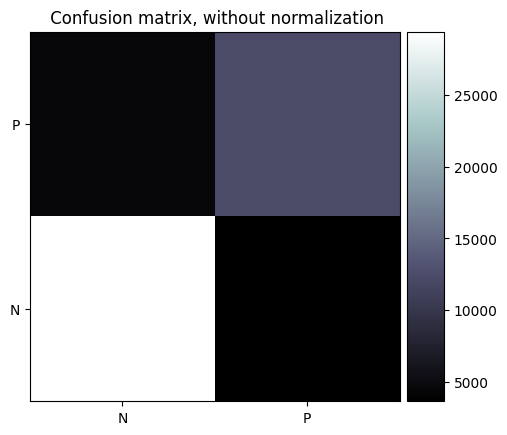

In [49]:
gbt_y_pred = gbt.predict(X_test)
plot_confusion_matrix(y_test, gbt_y_pred)

### Fig3: Confusin matrix for gradeint boosted on first dataset

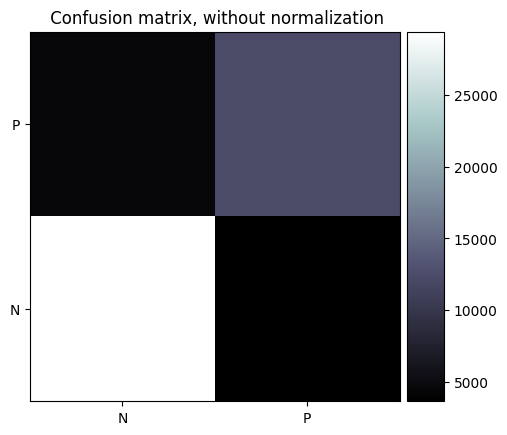

In [50]:
gbt_y_pred2 = gbt2.predict(X_test2)
plot_confusion_matrix(y_test2, gbt_y_pred2)

### ### Fig4: Confusin matrix for gradeint boosted on second dataset


- Use a Random Forest and a Gradiend Boosted Tree Regressor model to predict the weight of the particles. Compare the model performance on training and test setsm


In [51]:
traindata_weights, testdata_weights, train_weights, test_weights = train_test_split(higgsdata, weights, test_size=0.2, random_state=42)

In [52]:
from sklearn.ensemble import RandomForestRegressor
rfR = RandomForestRegressor(n_estimators=100, max_depth=5,
                                  random_state=0)
rfR.fit(traindata_weights, train_weights)


RandomForestRegressor(max_depth=5, random_state=0)

In [53]:
from sklearn.ensemble import GradientBoostingRegressor
gbtR = GradientBoostingRegressor(n_estimators=100, max_depth=5,
                                  random_state=0)
gbtR.fit(traindata_weights, train_weights)

GradientBoostingRegressor(max_depth=5, random_state=0)

In [54]:
print (f'  Random forest: X_train, y_train score:  {rfR.score(traindata_weights, train_weights):.2f}')
print (f' Random forest: X_test, X_test score:  {rfR.score(testdata_weights, test_weights):.2f}')
print (f'  Random forest: X_train, y_train score:  {gbtR.score(traindata_weights, train_weights):.2f}')
print (f' Random forest: X_test, X_test score:  {gbtR.score(testdata_weights, test_weights):.2f}')

  Random forest: X_train, y_train score:  0.55
 Random forest: X_test, X_test score:  0.55
  Random forest: X_train, y_train score:  0.64
 Random forest: X_test, X_test score:  0.63


 Calculate the L2 and L1 loss functions for the fitted regression models (see slides for the definition) and discuss the results

In [55]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
rfR_y_pred = rfR.predict(testdata_weights)
rfR_l1 = mean_absolute_error(test_weights, rfR_y_pred)
rfR_l2 = mean_squared_error(test_weights, rfR_y_pred)
print(f"L1 RF {rfR_l1:.2f}")
print(f"L2 RF {rfR_l2:.2f}")

L1 RF 0.92
L2 RF 1.58


- For the Random Forest classifier, find the 4 most important features based on the simple unoptimized model you created earlier on. Use the documentation to find out what they are. We have not talked abotu the physics of this problem at all but the Kaggle challenge description should provide enogh information for you to comment on this result is somewhat superficially.

You can use ```rf.feature_importance_``` on the trained model to extract the relative importance of each feature (a number from 0 to 1) and then choose the features that have the 4 highest numbers (the numpy function ```argsort()``` is helpful here!)

Explore the parameter space with the sklearn module ```sklearn.model_selection.RandomizedSearchCV``` *fitting only those 4 features*

Follow this example to set up the parameter search. Set the estimators to 10 and 100, (the number of trees) and the max depth to 3, and 10, and None (let it be unconstrained). Set bootstrap to both True and False. Set the number of features to consider at every split to both "autp" and "sqrt". Use ```pprint``` like I did earlier in this notebook to print the parameters set

**this takes some computational time! so do not start this at the last minute!!**





 mine and your best features do not necessarily have to be the same because our models may be different (different parameters, different random seed etc)

In [56]:
feature_importances = rf.feature_importances_
best_features_index = np.argsort(feature_importances)[-4:]

In [57]:
best_features = higgsdata.columns[best_features_index]

In [58]:
higgsdata_best = higgsdata.iloc[:, best_features_index]
higgsdata_best.shape

(250000, 4)

In [59]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
# Random search of parameters, using 3 fold cross validation,
# search across 18 different combinations
from sklearn.model_selection import RandomizedSearchCV
random_grid = {
    'n_estimators': [10, 100],
    'max_depth': [3, 10, None],
    'bootstrap': [True, False],
    'max_features': ['auto', 'sqrt']
}
pprint(random_grid)
random_search = RandomizedSearchCV(estimator = rf, param_distributions=random_grid, n_iter=18, cv=3)


{'bootstrap': [True, False],
 'max_depth': [3, 10, None],
 'max_features': ['auto', 'sqrt'],
 'n_estimators': [10, 100]}


Note that this may take a long time! It took 1 hour for me to run this. Dont start at the last minute!!

In [60]:
# added by me
X_train_subset = X_train.iloc[:, best_features_index]
X_test_subset = X_test.iloc[:, best_features_index]

In [61]:
best_features_index.shape

(4,)

In [62]:
random_search.fit(X_train_subset, y_train)
# to do the test in subset or the whole dataset

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0),
                   n_iter=18,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [3, 10, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [10, 100]})

In [63]:
best_params = random_search.best_params_
best_score = random_search.best_score_
print("Tuned RF  Parameters: {}".format(best_params))
print("Best score is {}".format(best_score))


Tuned RF  Parameters: {'n_estimators': 100, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': True}
Best score is 0.8146699974657209


In [64]:
df = pd.DataFrame(random_search.cv_results_)


In [65]:
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_features,param_max_depth,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,83.178492,0.303014,2.263705,0.024072,100,auto,None,False,"{'n_estimators': 100, 'max_features': 'auto', ...",0.797186,0.796361,0.797168,0.796905,0.000385,11
1,47.505288,0.277231,0.841767,0.001196,100,auto,10,False,"{'n_estimators': 100, 'max_features': 'auto', ...",0.815606,0.813416,0.813293,0.814105,0.001062,3
2,32.831118,0.061571,0.835205,0.002052,100,auto,10,True,"{'n_estimators': 100, 'max_features': 'auto', ...",0.815981,0.813866,0.814163,0.814670,0.000935,1
3,4.862553,0.730788,0.111238,0.011554,10,auto,10,False,"{'n_estimators': 10, 'max_features': 'auto', '...",0.815681,0.812921,0.812813,0.813805,0.001327,5
4,16.411284,0.135556,0.554737,0.030490,100,sqrt,3,False,"{'n_estimators': 100, 'max_features': 'sqrt', ...",0.792416,0.792581,0.791963,0.792320,0.000261,16
5,12.139108,0.626014,0.478476,0.073008,100,auto,3,True,"{'n_estimators': 100, 'max_features': 'auto', ...",0.794471,0.792716,0.794273,0.793820,0.000785,14
6,1.098360,0.005502,0.050166,0.000056,10,auto,3,True,"{'n_estimators': 10, 'max_features': 'auto', '...",0.789626,0.789911,0.789398,0.789645,0.000210,17
7,3.530579,0.403773,0.111894,0.014925,10,auto,10,True,"{'n_estimators': 10, 'max_features': 'auto', '...",0.814511,0.813986,0.812753,0.813750,0.000737,7
8,5.428945,0.526687,0.216984,0.021822,10,auto,None,True,"{'n_estimators': 10, 'max_features': 'auto', '...",0.793901,0.793841,0.793838,0.793860,0.000029,12
9,4.813187,0.826565,0.112051,0.013269,10,sqrt,10,False,"{'n_estimators': 10, 'max_features': 'sqrt', '...",0.815681,0.812921,0.812813,0.813805,0.001327,5


# Plot a simple 3-point ROC curve for the model with the best parameters found in the previous step. Describe it.

In [66]:
rf_best = RandomForestClassifier(n_estimators=best_params['n_estimators'],
                                  max_features=best_params['max_features'],
                                  max_depth=best_params['max_depth'],
                                  bootstrap=best_params['bootstrap'])
rf_best.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_depth=10, max_features='auto')

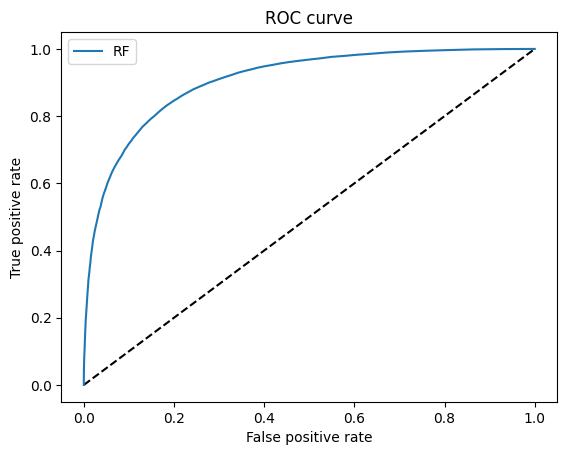

In [67]:
# The random forest model by itself
from sklearn.metrics import roc_curve
y_pred_grd_rfcat = rf.predict_proba(X_test)[:, 1]

fpr_rf, tpr_rf, _ = roc_curve(y_test.flatten()== 1, y_pred_grd_rfcat, pos_label = 1)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()


### Fig 5: ROC curve for the  first dataset.

In [69]:
rf_best2 = RandomForestClassifier(n_estimators=best_params['n_estimators'],
                                  max_features=best_params['max_features'],
                                  max_depth=best_params['max_depth'],
                                  bootstrap=best_params['bootstrap'])
rf_best2.fit(X_train2, y_train2)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_depth=10, max_features='auto')

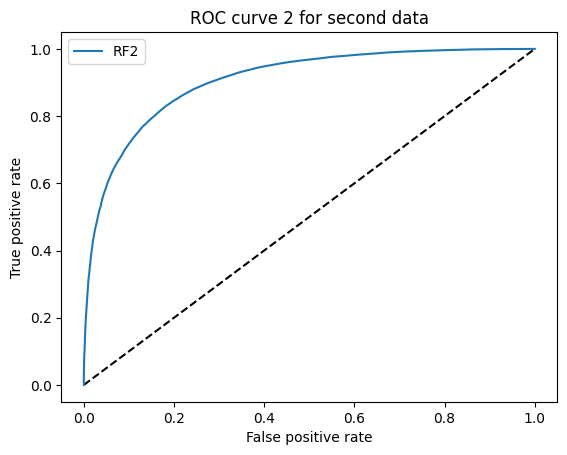

In [71]:
from sklearn.metrics import roc_curve
y_pred_grd_rfcat2 = rf2.predict_proba(X_test2)[:, 1]

fpr_rf2, tpr_rf2, _ = roc_curve(y_test2.flatten()== 1, y_pred_grd_rfcat2, pos_label = 1)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf2, tpr_rf2, label='RF2')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve 2 for second data')
plt.legend(loc='best')
plt.show()

### Fig 6: ROC curve for the  second dataset.

### In summary, my observation of similar ROC curves across datasets and the consistent model performance suggest that your current approach, including the handling of -999.00 values and the use of Random Forest and Gradient Boosted Trees, is appropriate for this specific dataset and problem. It's crucial to combine statistical analysis with domain expertise to make informed decisions about data preprocessing and model selection.